White pixel percentage: 0.27%
The image does not contain clouds.


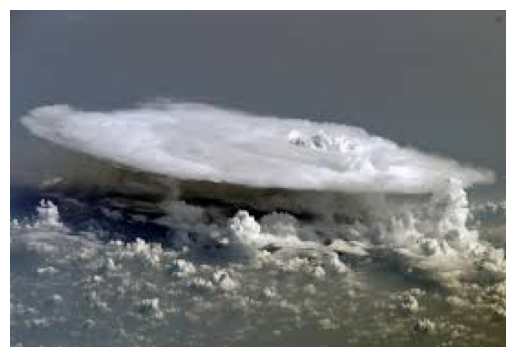

In [7]:
from PIL import Image
import numpy as np

def is_white_pixel(pixel):
    """Check if a pixel is white."""
    return all(channel >= 240 for channel in pixel)

def calculate_white_percentage(image_path):
    """Calculate the percentage of white pixels in an image."""
    # Open the image
    image = Image.open(image_path)
    image = image.convert('RGB')  # Ensure image is in RGB format
    
    # Convert image to numpy array
    np_image = np.array(image)
    
    # Get total number of pixels
    total_pixels = np_image.shape[0] * np_image.shape[1]
    
    # Count white pixels
    white_pixels = sum(is_white_pixel(pixel) for row in np_image for pixel in row)
    
    # Calculate percentage of white pixels
    white_percentage = (white_pixels / total_pixels) * 100
    
    return white_percentage

def contains_cloud(image_path, threshold=30.0):
    """Determine if an image contains clouds based on the percentage of white pixels."""
    white_percentage = calculate_white_percentage(image_path)
    print(f"White pixel percentage: {white_percentage:.2f}%")
    
    return white_percentage >= threshold


def display_image(image_path):
    """Display the image using matplotlib."""
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.show()




# Test the function with the provided image path
image_path = r'C:\Users\abudh\Downloads\Cloud1.jpg'
if contains_cloud(image_path):
    print("The image contains clouds.")
else:
    print("The image does not contain clouds.")

display_image(image_path)


White pixel percentage: 17.03%
Average color: RGB(156, 156, 156)
The image does not contain clouds.


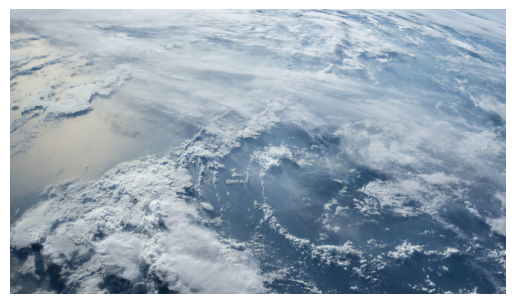

In [9]:
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt

def is_white_pixel(pixel, threshold=240):
    """Check if a pixel is white."""
    return all(channel >= threshold for channel in pixel)

def normalize_image(image):
    """Normalize the image to enhance contrast."""
    # Convert image to grayscale
    gray_image = ImageEnhance.Color(image).enhance(0)
    # Enhance contrast
    enhancer = ImageEnhance.Contrast(gray_image)
    normalized_image = enhancer.enhance(2)  # Adjust the enhancement factor as needed
    return normalized_image.convert('RGB')

def calculate_white_percentage_and_average_color(image_path):
    """Calculate the percentage of white pixels and average color in an image."""
    # Open the image
    image = Image.open(image_path)
    image = normalize_image(image)
    
    # Convert image to numpy array
    np_image = np.array(image)
    
    # Get total number of pixels
    total_pixels = np_image.shape[0] * np_image.shape[1]
    
    # Initialize white pixel count and color sum
    white_pixels = 0
    color_sum = np.zeros(3, dtype=int)
    
    # Count white pixels and sum colors
    for row in np_image:
        for pixel in row:
            if is_white_pixel(pixel):
                white_pixels += 1
            color_sum += pixel
    
    # Calculate percentage of white pixels
    white_percentage = (white_pixels / total_pixels) * 100
    
    # Calculate average color
    average_color = color_sum // total_pixels
    
    return white_percentage, tuple(average_color)

def contains_cloud(image_path, threshold=30.0):
    """Determine if an image contains clouds based on the percentage of white pixels."""
    white_percentage, average_color = calculate_white_percentage_and_average_color(image_path)
    print(f"White pixel percentage: {white_percentage:.2f}%")
    print(f"Average color: RGB{average_color}")
    
    return white_percentage >= threshold

def display_image(image_path):
    """Display the image using matplotlib."""
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.show()

# Test the function with the provided image path
image_path = r'C:\Users\abudh\Downloads\Cloud2.jpg'
if contains_cloud(image_path):
    print("The image contains clouds.")
else:
    print("The image does not contain clouds.")

# Display the image
display_image(image_path)


Blue pixel percentage: 0.15%
The image does not contain clouds.


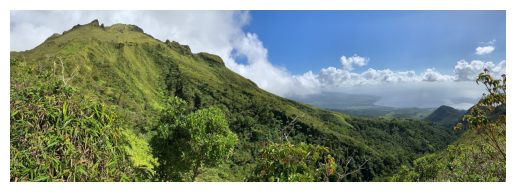

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def apply_blue_filter(image):
    """Apply a blue filter to isolate blue pixels."""
    np_image = np.array(image)
    # Isolate the blue channel
    blue_channel = np_image[:, :, 2]  # Index 2 corresponds to the blue channel

    # Create a mask for blue pixels
    blue_mask = (np_image[:, :, 0] < 100) & (np_image[:, :, 1] < 100) & (blue_channel > 100)
    
    # Apply mask to get only blue areas
    filtered_image = np.zeros_like(np_image)
    filtered_image[blue_mask] = np_image[blue_mask]

    return Image.fromarray(filtered_image)

def calculate_blue_percentage(image):
    """Calculate the percentage of blue pixels in the image."""
    np_image = np.array(image)
    total_pixels = np_image.shape[0] * np_image.shape[1]
    
    # Create a mask for blue pixels
    blue_mask = (np_image[:, :, 0] < 100) & (np_image[:, :, 1] < 100) & (np_image[:, :, 2] > 100)
    
    # Count blue pixels
    blue_pixels = np.sum(blue_mask)
    
    # Calculate percentage
    blue_percentage = (blue_pixels / total_pixels) * 100
    
    return blue_percentage

def contains_cloud_using_blue_filter(image_path, threshold=30.0):
    """Determine if an image contains clouds based on the blue filter and percentage of blue pixels."""
    image = Image.open(image_path)
    filtered_image = apply_blue_filter(image)
    
    blue_percentage = calculate_blue_percentage(filtered_image)
    print(f"Blue pixel percentage: {blue_percentage:.2f}%")
    
    return blue_percentage >= threshold

def display_image(image_path):
    """Display the image using matplotlib."""
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.show()

# Test the function with the provided image path
image_path = r'C:\Users\abudh\Downloads\Cloud5.jpg'
if contains_cloud_using_blue_filter(image_path):
    print("The image contains clouds.")
else:
    print("The image does not contain clouds.")

# Display the original image
display_image(image_path)


Blue pixel percentage: 0.00%
The image does not contain clouds.


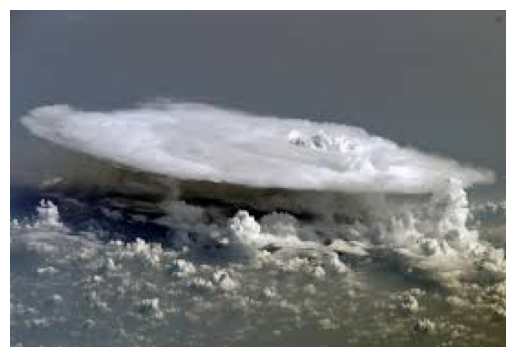

In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def apply_blue_filter(image, blue_threshold=150, min_saturation=0.3):
    """Apply a blue filter to isolate blue pixels with improved thresholds."""
    np_image = np.array(image)
    
    # Convert RGB to HSV (Hue, Saturation, Value)
    hsv_image = np.array(Image.fromarray(np_image, 'RGB').convert('HSV'))
    blue_channel = hsv_image[:, :, 0]  # Hue channel
    saturation_channel = hsv_image[:, :, 1]  # Saturation channel
    value_channel = hsv_image[:, :, 2]  # Value channel

    # Create a mask for blue pixels: hue range for blue [90, 140]
    blue_mask = (blue_channel >= 90) & (blue_channel <= 140) & (saturation_channel > min_saturation) & (value_channel > blue_threshold)

    # Apply mask to get only blue areas
    filtered_image = np.zeros_like(np_image)
    filtered_image[blue_mask] = np_image[blue_mask]

    return Image.fromarray(filtered_image)

def calculate_blue_percentage(image):
    """Calculate the percentage of blue pixels in the image."""
    np_image = np.array(image)
    total_pixels = np_image.shape[0] * np_image.shape[1]

    # Create a mask for blue pixels
    blue_mask = (np_image[:, :, 0] < 100) & (np_image[:, :, 1] < 100) & (np_image[:, :, 2] > 100)
    
    # Count blue pixels
    blue_pixels = np.sum(blue_mask)
    
    # Calculate percentage
    blue_percentage = (blue_pixels / total_pixels) * 100
    
    return blue_percentage

def contains_cloud_using_blue_filter(image_path, threshold=30.0):
    """Determine if an image contains clouds based on the blue filter and percentage of blue pixels."""
    image = Image.open(image_path)
    filtered_image = apply_blue_filter(image)
    
    blue_percentage = calculate_blue_percentage(filtered_image)
    print(f"Blue pixel percentage: {blue_percentage:.2f}%")
    
    return blue_percentage >= threshold

def display_image(image_path):
    """Display the image using matplotlib."""
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.show()

# Test the function with the provided image path
image_path = r'C:\Users\abudh\Downloads\Cloud1.jpg'
if contains_cloud_using_blue_filter(image_path):
    print("The image contains clouds.")
else:
    print("The image does not contain clouds.")

# Display the original image
display_image(image_path)


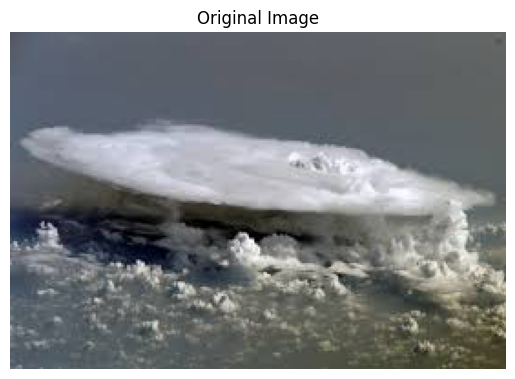

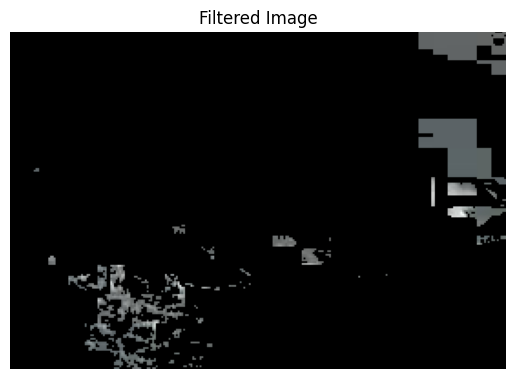

Blue pixel percentage: 1.10%
The image does not contain clouds.


In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def apply_blue_filter(image, blue_threshold=100, min_saturation=0.3):
    """Apply a blue filter to isolate blue pixels with improved thresholds."""
    if image.mode != 'RGB':
        image = image.convert('RGB')
    
    np_image = np.array(image)
    
    # Convert RGB to HSV (Hue, Saturation, Value)
    hsv_image = np.array(Image.fromarray(np_image, 'RGB').convert('HSV'))
    hue_channel = hsv_image[:, :, 0]  # Hue channel
    saturation_channel = hsv_image[:, :, 1]  # Saturation channel
    value_channel = hsv_image[:, :, 2]  # Value channel

    # Define blue hue range (around 180 degrees in hue)
    blue_mask = (hue_channel >= 100) & (hue_channel <= 140) & (saturation_channel > min_saturation) & (value_channel > blue_threshold)

    # Apply mask to get only blue areas
    filtered_image = np.zeros_like(np_image)
    filtered_image[blue_mask] = np_image[blue_mask]

    return Image.fromarray(filtered_image)

def calculate_blue_percentage(image):
    """Calculate the percentage of blue pixels in the image."""
    np_image = np.array(image)
    total_pixels = np_image.shape[0] * np_image.shape[1]

    # Create a mask for blue pixels
    blue_mask = (np_image[:, :, 0] < 100) & (np_image[:, :, 1] < 100) & (np_image[:, :, 2] > 100)
    
    # Count blue pixels
    blue_pixels = np.sum(blue_mask)
    
    # Calculate percentage
    blue_percentage = (blue_pixels / total_pixels) * 100
    
    return blue_percentage

def contains_cloud_using_blue_filter(image_path, threshold=30.0):
    """Determine if an image contains clouds based on the blue filter and percentage of blue pixels."""
    image = Image.open(image_path)
    
    # Display original image
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    
    filtered_image = apply_blue_filter(image)
    
    # Display filtered image
    plt.imshow(filtered_image)
    plt.title("Filtered Image")
    plt.axis('off')
    plt.show()
    
    blue_percentage = calculate_blue_percentage(filtered_image)
    print(f"Blue pixel percentage: {blue_percentage:.2f}%")
    
    return blue_percentage >= threshold

# Test the function with the provided image path
image_path = r'C:\Users\abudh\Downloads\Cloud1.jpg'
if contains_cloud_using_blue_filter(image_path):
    print("The image contains clouds.")
else:
    print("The image does not contain clouds.")


Cloud pixel percentage: 25.63%


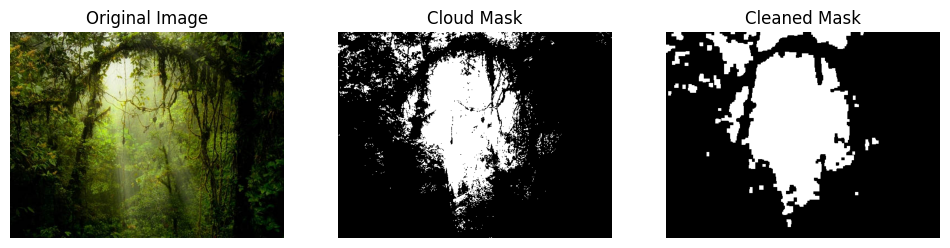

The image does not contain significant cloud coverage.


In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """Load and preprocess the image."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    return image, gray_image

def enhance_image(gray_image):
    """Enhance the contrast of the grayscale image."""
    # Apply histogram equalization
    enhanced_image = cv2.equalizeHist(gray_image)
    return enhanced_image

def segment_clouds(enhanced_image, threshold=200):
    """Segment clouds using a simple threshold."""
    _, cloud_mask = cv2.threshold(enhanced_image, threshold, 255, cv2.THRESH_BINARY)
    return cloud_mask

def postprocess_mask(cloud_mask):
    """Clean up the segmented mask."""
    # Apply morphological operations
    kernel = np.ones((5, 5), np.uint8)
    cleaned_mask = cv2.morphologyEx(cloud_mask, cv2.MORPH_CLOSE, kernel)
    cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_OPEN, kernel)
    return cleaned_mask

def calculate_cloud_coverage(cleaned_mask):
    """Calculate the percentage of cloud coverage."""
    total_pixels = cleaned_mask.size
    cloud_pixels = np.sum(cleaned_mask == 255)
    cloud_percentage = (cloud_pixels / total_pixels) * 100
    return cloud_percentage

def display_results(image, cloud_mask, cleaned_mask):
    """Display the original image, cloud mask, and cleaned mask."""
    plt.figure(figsize=(12, 8))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cloud_mask, cmap='gray')
    plt.title("Cloud Mask")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cleaned_mask, cmap='gray')
    plt.title("Cleaned Mask")
    plt.axis('off')

    plt.show()

def contains_significant_cloud_coverage(image_path, coverage_threshold=30.0):
    """Determine if the image contains significant cloud coverage."""
    image, gray_image = preprocess_image(image_path)
    enhanced_image = enhance_image(gray_image)
    cloud_mask = segment_clouds(enhanced_image)
    cleaned_mask = postprocess_mask(cloud_mask)
    cloud_percentage = calculate_cloud_coverage(cleaned_mask)
    
    print(f"Cloud pixel percentage: {cloud_percentage:.2f}%")
    
    # Display results for validation
    display_results(image, cloud_mask, cleaned_mask)
    
    return cloud_percentage >= coverage_threshold

# Test the function with the provided image path
image_path = r'C:\Users\abudh\Downloads\Cloud4.jpg'
if contains_significant_cloud_coverage(image_path):
    print("The image contains significant cloud coverage.")
else:
    print("The image does not contain significant cloud coverage.")


Cloud Coverage: 26.17%
The image is not covered by clouds.


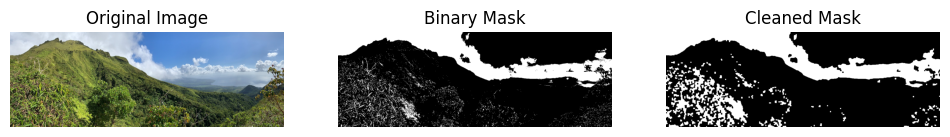

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Normalize contrast (Optional: Adjust according to your needs)
    normalized_image = cv2.equalizeHist(gray_image)
    return normalized_image

def segment_clouds(image):
    # Apply a binary threshold to segment clouds
    # You may need to adjust the threshold value
    _, binary_mask = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
    return binary_mask

def postprocess_mask(mask):
    # Apply morphological operations to clean up the mask
    kernel = np.ones((5, 5), np.uint8)
    cleaned_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_OPEN, kernel)
    return cleaned_mask

def calculate_cloud_coverage(mask):
    # Calculate the percentage of the image covered by clouds
    total_pixels = mask.size
    cloud_pixels = cv2.countNonZero(mask)
    cloud_percentage = (cloud_pixels / total_pixels) * 100
    return cloud_percentage

def main(image_path, threshold_percentage=30):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Segment the clouds
    binary_mask = segment_clouds(preprocessed_image)
    
    # Postprocess the mask
    cleaned_mask = postprocess_mask(binary_mask)
    
    # Calculate cloud coverage
    cloud_percentage = calculate_cloud_coverage(cleaned_mask)
    
    # Display results
    print(f"Cloud Coverage: {cloud_percentage:.2f}%")
    if cloud_percentage >= threshold_percentage:
        print("The image is covered by clouds.")
    else:
        print("The image is not covered by clouds.")
    
    # Optional: Display the images
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title('Binary Mask')
    plt.imshow(binary_mask, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title('Cleaned Mask')
    plt.imshow(cleaned_mask, cmap='gray')
    plt.axis('off')
    
    plt.show()

if __name__ == "__main__":
    image_path = r'C:\Users\abudh\Downloads\Cloud5.jpg'
    main(image_path)
